# Python Project - Marvel Mart Project 
# Khanh Quach
# March 15th 2023

# The Report Questions 

Outline: 
Part 1: Cleaning the Data

Part 2: Exploratory Data Analysis with Reports & Visualization 
        
        1. Country Rankings 
        2. Count of Sales Channels & Order Priorities 
        3. Profits by Item Type 
        4. Descriptive Statistics
        
Part 3: Cross-referencing the Data

In [237]:
# Import tool to use 
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import csv
#from __future__ import division
pd.set_option('display.float_format', lambda x: '%.3f' % x) # converts all decimals to 3 numbers after decimal place
import seaborn as sns
sns.set(style='ticks', palette='Set2') 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Part 1: Cleaning the Data

In [238]:
# load the data 
mm_sales = pd.read_csv('Data/MM_Sales.csv')
# From this we can see that Item Type and Order Priority are having missing data
mm_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       49994 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  49985 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  object 
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64
 11  Total Revenue   50000 non-null  float64
 12  Total Cost      50000 non-null  float64
 13  Total Profit    50000 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 5.3+ MB


In [239]:
# Create a clean copy for our data frame. 
mm_salesClean = mm_sales.copy()

In [240]:
# Check for ALL MISSING Data in each individual column
mm_sales.isna().sum()
# from this we know that Order Priority and Item Type are having problem with thier data
# they might be missing therefore the data can't work properly 

Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64

In [241]:
mm_salesClean['Item Type'].fillna("NULL", inplace = True) 
mm_salesClean['Order Priority'].fillna("NULL", inplace = True)

In [242]:
# check if there any data in Country which is not a string 
print("\nTesting erronous data in Country")
count = 0
for index, row in mm_salesClean.iterrows():
    try:
        # check whether the data things is missing or not. If exist it suppose to be a string       
        row.loc['Country'] = float(row.loc['Country']) # convert to float type
        mm_salesClean.loc[int(index), 'Country'] = "NULL" # if already format as float, replace it with NULL
        print(mm_salesClean.loc[int(index), 'Country'])   # print to verify changes
        count+=1
    except: 
        1==1
    
print("Number of erronous is " + str(count)) # find out the number of error data


Testing erronous data in Country
NULL
NULL
NULL
Number of erronous is 3


In [243]:
# check if there any data in Order ID which is not an interger or missing 
count = 0
for index, row in mm_salesClean.iterrows(): 
    try:
        row.loc['Order ID'] = int(row.loc['Order ID'])  
    except:
        print(row.loc['Order ID'])
        mm_salesClean.loc[int(index), 'Order ID'] = 0
        print(mm_salesClean.loc[int(index), 'Order ID'])
        count += 1

print("Number of erronous is " + str(count)) # find out the number of error data

Cosmetics
0
Fruits
0
Snacks
0
Meat
0
Snacks
0
Number of erronous is 5


In [244]:
# Remove all values that contain 9 or NULL in it.
mm_salesClean = mm_salesClean[mm_salesClean['Country'] != "NULL"]
mm_salesClean = mm_salesClean[mm_salesClean['Item Type'] != "NULL"]
mm_salesClean = mm_salesClean[mm_salesClean['Order Priority'] != "NULL"]
mm_salesClean = mm_salesClean[mm_salesClean['Order ID'] != 0]

In [245]:
# Print out to make sure that there are no data containing 0 or NULL.
print(mm_salesClean['Country'][mm_salesClean['Country']=='NULL'].count()) 
print(mm_salesClean['Item Type'][mm_salesClean['Item Type']=='NULL'].count()) 
print(mm_salesClean['Order Priority'][mm_salesClean['Order Priority']=='NULL'].count()) 
print(mm_salesClean['Order ID'][mm_salesClean['Order ID']==0].count()) 

0
0
0
0


In [246]:
mm_salesClean.isnull().sum() #check for missing values once again after clean the data

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [247]:
# write it to a new csv file. Index = false to delete the first column we use to track 
mm_salesClean.to_csv("Data/MM_Sales_clean.csv", index = False)

In [248]:
 #check the data type for each column once again to make sure it all match 
mm_salesClean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49971 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          49971 non-null  object 
 1   Country         49971 non-null  object 
 2   Item Type       49971 non-null  object 
 3   Sales Channel   49971 non-null  object 
 4   Order Priority  49971 non-null  object 
 5   Order Date      49971 non-null  object 
 6   Order ID        49971 non-null  object 
 7   Ship Date       49971 non-null  object 
 8   Units Sold      49971 non-null  int64  
 9   Unit Price      49971 non-null  float64
 10  Unit Cost       49971 non-null  float64
 11  Total Revenue   49971 non-null  float64
 12  Total Cost      49971 non-null  float64
 13  Total Profit    49971 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 5.7+ MB


# Part 2: Exploratory Data Analysis with Reports & Visualizations

Question 1: "We want to know which countries we sell the most so we can pick a new location to build a shipping center. Rank the Top 10 countries we sell to the most to least along with the number of sales we've had with that country." (note you are getting a count of the number of sale transactions here not the sum of the total sales)


1. Use Seaborn or Mathplotlib to create a chart of your choice showing these top 10 values by country.

We have shipping centers in Trinidad and Tobago, Guinea, and Maldives right now. Which country should we build a shipping center in based on most sales and lack of shipping center? When I say most sales, I'm talking about the most sales transactions, not the most sales amount. A sales transaction is represented by a row. Please justify your reasoning.


In [249]:
# MMSales = df as we always note. Just change the name to make sure it make sense in this case
MMSales = pd.read_csv('Data/MM_Sales_clean.csv')

In [250]:
# count the number once again to make sure all the data have the same amount of rows 
print(MMSales.count())

Region            49971
Country           49971
Item Type         49971
Sales Channel     49971
Order Priority    49971
Order Date        49971
Order ID          49971
Ship Date         49971
Units Sold        49971
Unit Price        49971
Unit Cost         49971
Total Revenue     49971
Total Cost        49971
Total Profit      49971
dtype: int64


# 1.1

Q1.1/ Find the top 10. 

In [251]:
# We rank the top ten nations based on the number of sales transactions and display them in a bar graph.
numberofSales = MMSales.Country.value_counts()
top10Sales = numberofSales.nlargest(10, 'all')
print(top10Sales)

Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Country, dtype: int64


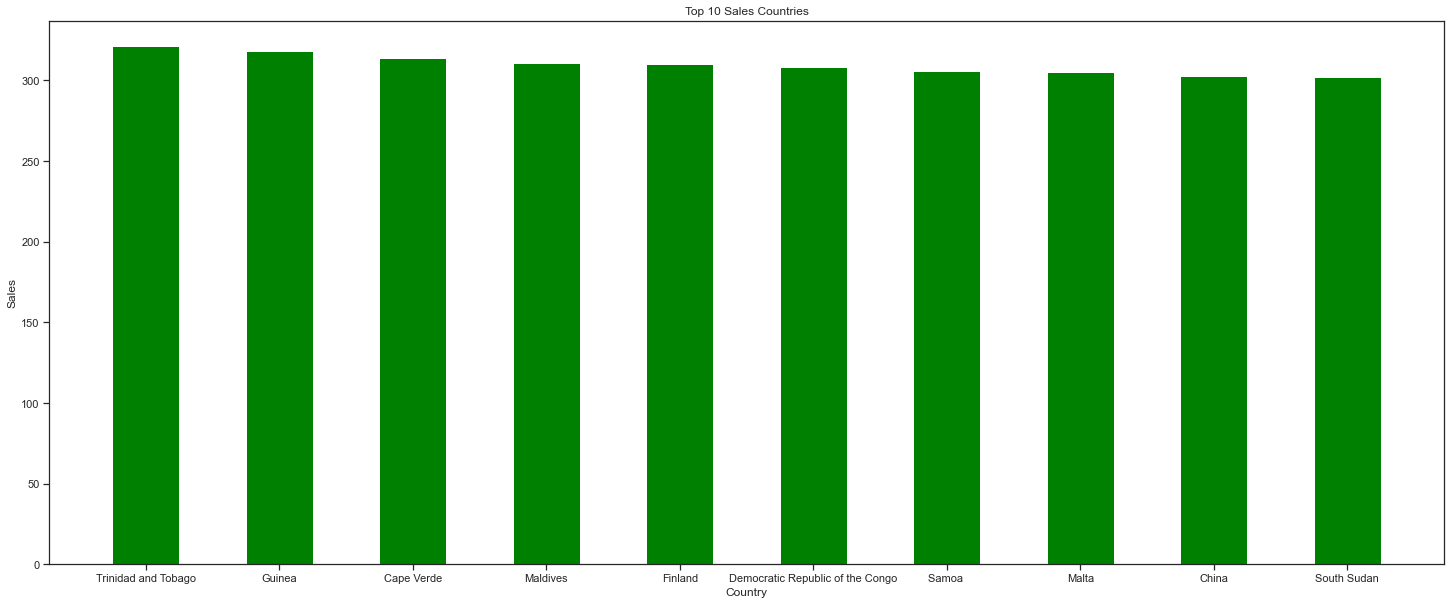

In [252]:
plt.figure(figsize=(25,10)) # change the figure size
plt.bar (top10Sales.index, top10Sales.values, color = 'green',width = 0.5)
plt.title('Top 10 Sales Countries') # add title to the chart 
plt.xlabel('Country') # add label for the x axis 
plt.ylabel('Sales') # add label for the y axis 
plt.show()

2. Write the results to a text file called MM_Rankings.txt.

1. Be sure to use append so that you can append data rather than writing over top of the previous data 
2. Include a newline between each append to the file 
3. When writing to the file, please output in a text form such as: 

Countries Most Sale Transactions:
(Country Name): (number of sales transactions)
(Country Name): (number of sales transactions)
...
(Answer question) "The country we should build our shipping center is ______ because ____..."


# 1.2

Q1.2/Write the results into the file MM_Rankings.txt

In [253]:
#create a new txt file called MM_Ranking
with open("Data/MM_Ranking.txt", "w+") as writer:
    writer.write("Countries Most Sale Transactions:")

In [254]:
#write the result to MM_Ranking using append 
with open("Data/MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nTrinidad and Tobago:321\nGuinea:318\nCape Verde:314\nMaldives:311\nFinland:310\nDemocratic Republic of the Congo:308\nSamoa:306\nMalta:305\nChina:303\nSouth Sudan:302\n")
        writer.writelines("\nSince Cape Verde has the third highest number of sales and there is not yet a shipping center there, it is the nation in which we need to establish our distribution center.")

Question 2: "Now we will need you to determine how many online and offline orders that our company takes. Also, if you could let us know the count of the different Order Priority types, that would be great. Please show us this in a pie chart format."


1. Determine the count for how many online and offline order we take.
2. Determine the count of different Order Priority types.
3. Create a pie chart for each showing the differences in values (use Seaborn or Matplotlib).
4. Add the results of the sales channel types and the order priorities to the file MM_Rankings.txt.
Be sure to use append so that you can append data rather than writing over top of the previous data.
Include a newline between each append to the file.
When writing to the file, please output in a text form such as: 

# 2.1

Q2.1/ Determine the count for how many online and offline orders we take.

In [255]:
# sort and count online and offline order by Order ID 
OrderTypeCount = MMSales.groupby('Sales Channel').count()[['Order ID']]
OrderTypeCount

,Order ID
Sales Channel,
Offline,19788
Online,30183


# 2.2 

Q2.2/ Determine count of different Order Priority types 

In [256]:
# sort and count order priorities by Order ID 
OrderPriorityTypes = MMSales.groupby('Order Priority').count()[['Order ID']]
OrderPriorityTypes

,Order ID
Order Priority,
C,5012
H,15094
L,9984
M,19881


# 2.3

Q2.3/ Create a pie chart for each showing the differences in values (use Seaborn or Matplotlib).


In [257]:
#create a data frame from the Sales Channels sorting result to plot 
saledf=pd.DataFrame([['Offline',19788],['Online',30183]],columns=['Sales Channel', 'Number of Sales'])
print(saledf)

  Sales Channel  Number of Sales
0       Offline            19788
1        Online            30183


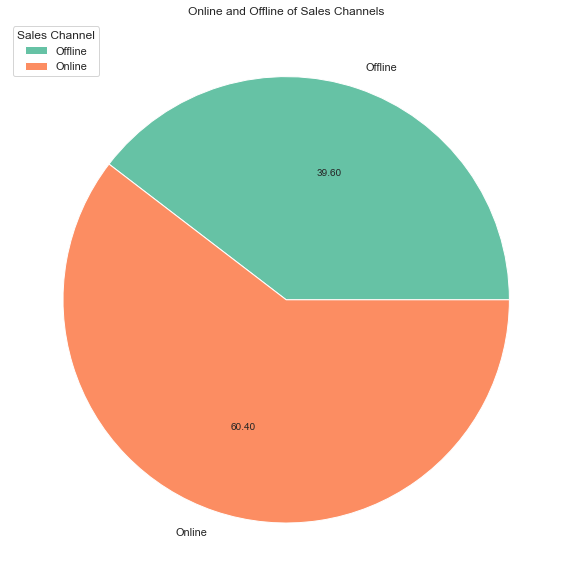

In [258]:
#plot a pie chart based on the above data frame
sales_channel = saledf['Sales Channel']
number_of_sales = saledf["Number of Sales"]
plt.figure(figsize=(10, 15)) 
plt.pie(number_of_sales, labels=sales_channel, autopct='%.2f') # set display 2 decimals after
plt.legend(loc=2, title='Sales Channel')
plt.title("Online and Offline of Sales Channels")
plt.show()

In [259]:
#create a data frame from the Order Priority sorting result to plot
orderDf=pd.DataFrame([['C',5012],['H',15094],['L',9984],['M',19881]],columns=['Order Priority', 'Number of Sales'])
print(orderDf)

  Order Priority  Number of Sales
0              C             5012
1              H            15094
2              L             9984
3              M            19881


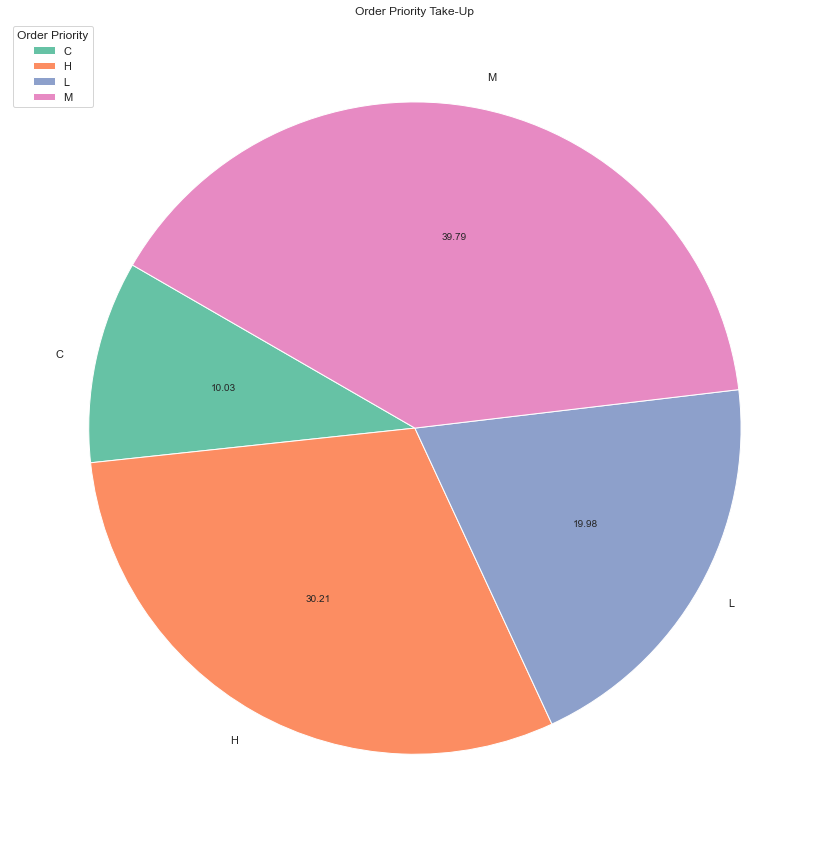

In [260]:
#plot a pie chart based on the above data frame
order_prior = orderDf["Order Priority"]
number_of_sales = orderDf["Number of Sales"]
plt.figure(figsize=(15, 15)) 
plt.pie(number_of_sales, labels=order_prior, #set autopct to display the value with 2 decimal place
autopct='%.2f', startangle=150)
plt.legend(loc=2, title="Order Priority")
plt.title("Order Priority Take-Up")
plt.show()

# 2.4

Q2.4/ Add the results of the highest sales channel type and the highest order priority to the file
MM_Rankings.txt

In [261]:
#write the result of Sales Channels to MM_Ranking
with open("Data/MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nSales Channels:\n")
        writer.writelines("\nOnline:30183\nOffline:19788")
        writer.writelines("\nWe do more Online sales.\n")

In [262]:
##write the result of Order Priorities to MM_Ranking
with open("Data/MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nOrder Prorities:")
        writer.writelines("\nL:9984\nM:19881\nH:15094\nC:5012")
        writer.writelines("\nWe do more M priorities.\n")
        

Question 3: "For our next section, we will need you to give us an idea of how well our Item Types are producing profits for us. At the end, report to us which 3 item types are providing the most profit."

1. Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.
2. Use Python to determine the sum of Total Profit by Item Type.
3. Now create a chart type of your choice (Seaborn or Matplotlib) showing the sums of the different Item Types.
4. Now, using Python, rank the top 3 item types we did the most sales (brought in most profit) in to the least sales. (Use 'Total Profit' to determine this).  Please list the item types and the amount of profit made from sales.
5. Add the results of the top 3 item types to the file MM_Rankings.txt.
Be sure to use append so that you can append data rather than writing over top of the previous data.
Include a newline between each append to the file.
When writing to the file, please output in a text form such as: 
6. Provide a markdown section discussing the results of the boxplots. Discuss what is being shown in the boxplots amd do some business analytics around what sort of use this sort of chart might help in making decisions. Are there any unexpected results? Discuss them.

# 3.1

Q3.1/ Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.


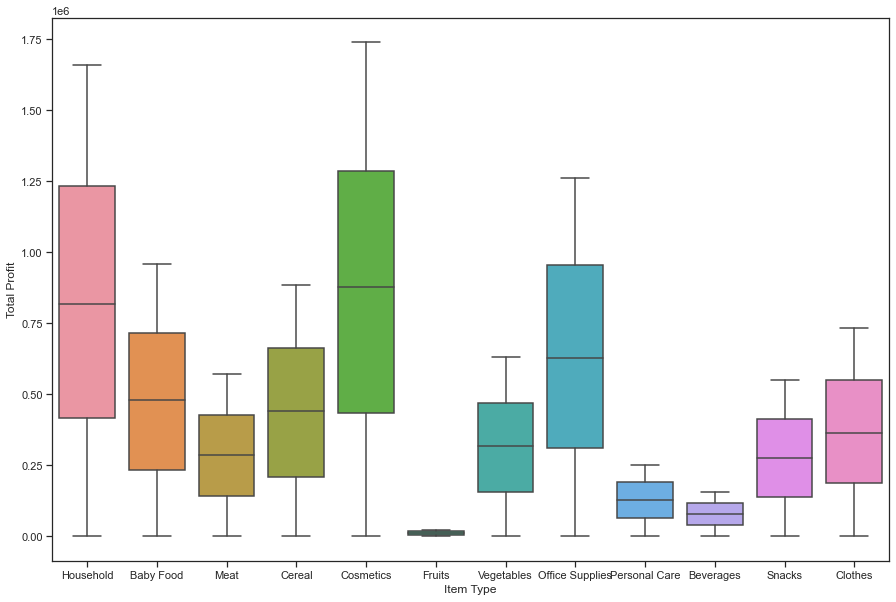

In [263]:
#Create a Boxplot using Seaborn showing the Total Profits DISTRIBUTION by Item Type.
plt.figure(figsize=(15,10))
ax=sns.boxplot(x="Item Type", y="Total Profit", data=MMSales)

# 3.2

Q3.2/ Use Python to determine the sum of Total Profit by Item Type

In [264]:
#group the item type then find the sum of Total Profit
TotalProfit = MMSales.groupby('Item Type').sum()[['Total Profit']]
print(TotalProfit)

                  Total Profit
Item Type                     
Baby Food       1942865748.120
Beverages        327559249.080
Cereal          1824726412.290
Clothes         1520832019.680
Cosmetics       3638407966.750
Fruits            51010570.920
Household       3401180998.060
Meat            1196342404.400
Office Supplies 2605440187.500
Personal Care    535250525.600
Snacks          1149715758.720
Vegetables      1322639660.240


# 3.3

Q3.3/ Now create a chart type of your choice (Seaborn or Matplotlib) showing the sums of the different Item Types.

In [265]:
#create a dictionary from the above result
ByType={'Item Types':['Baby Food','Beverages','Cereal','Clothes','Cosmestics',
        'Fruits','Household','Meat','Office Supplies',
        'Personal Care','Snacks','Vegetables'],'Sum Of Total Profit':[1942865748.120, 327559249.080, 1824726412.290, 1520832019.680,
                3638407966.750, 51010570.920, 3401180998.060, 1196342404.400,
                2605440187.500, 535250525.600, 1149715758.720, 1322639660.240]}
 #create a data frame from the dictionary         
byType=pd.DataFrame(ByType,columns=['Item Types','Sum Of Total Profit'])
print(byType)

         Item Types  Sum Of Total Profit
0         Baby Food       1942865748.120
1         Beverages        327559249.080
2            Cereal       1824726412.290
3           Clothes       1520832019.680
4        Cosmestics       3638407966.750
5            Fruits         51010570.920
6         Household       3401180998.060
7              Meat       1196342404.400
8   Office Supplies       2605440187.500
9     Personal Care        535250525.600
10           Snacks       1149715758.720
11       Vegetables       1322639660.240


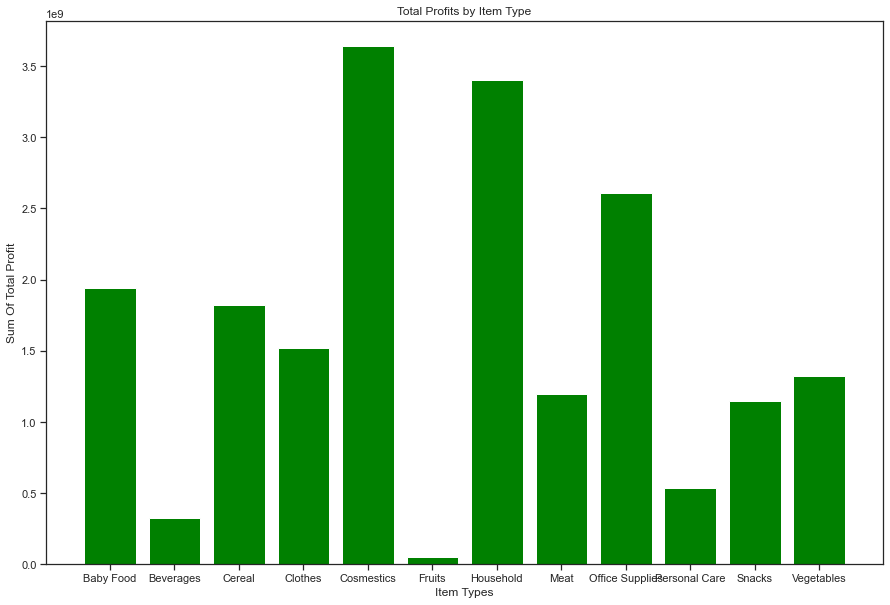

In [266]:
#plot a bar chart showing the sums of the different Item Types
x=byType['Item Types'] #assign Item Types as variable x
y=byType['Sum Of Total Profit']#assign Sum Of Total Profit as variable y
plt.figure(figsize=(15, 10)) #set a figure size
plt.title('Total Profits by Item Type') #add title
plt.xlabel('Item Types') #add label for x axis
plt.ylabel('Sum Of Total Profit') #add label for y axis
plt.bar(x, y, color = 'green') #select type of visualization
plt.show()

# 3.4

Q3.4/ Now, using Python, rank the top 3 item types we did the most sales (brought in most profit) in to the least sales. (Use 'Total Profit' to determine this). Please list the item types and the amount of profit made from sales.



In [267]:
#using nlargest to get the top 3 largest Sum of Total Profit
Top3 = byType.groupby('Item Types').sum()[['Sum Of Total Profit']].nlargest(3, 'Sum Of Total Profit') 
Rank = pd.DataFrame(Top3)
print(Rank)

                 Sum Of Total Profit
Item Types                          
Cosmestics            3638407966.750
Household             3401180998.060
Office Supplies       2605440187.500


# 3.5

Q3.5/ Add the results of the top 3 item types to the file MM_Rankings.txt.



In [268]:
#write the results to MM_Rankings
with open("Data/MM_Ranking.txt", "a+") as writer:
        writer.writelines("\nHighest Selling Items:")
        writer.writelines("\nCosmestics:3638407966.750\nHousehold:3401180998.060\nOffice Supplies: 2605440187.500")
        writer.writelines("\nWe profited from Cosmetic the most.")

# 3.6

Q3.6/ Provide a markdown section discussing the results of the boxplots. Discuss what is being shown in the boxplots amd do some business analytics around what sort of use this sort of chart might help in making decisions. Are there any unexpected results? Discuss them.

The boxplot revealed no extreme values or outliers. It's fair to infer that the figures for specific item kinds' profitability aren't too far off. Cosmetic is the most profitable item kind, whereas Fruits is the least profitable item type. Every single boxplot exhibits a declining trend.

Question 4: "Finally, we need you to determine some descriptive statistics for us. Please determine the sum, average and maximum values for the Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit. Please put this in a report."

1. Produce the data above for the sum of the requested columns.
2. Produce the data above for the average of the requested columns. (Average Units Sold, Average Cost, etc)
3. Produce the data above for the maximum of the requested columns. (Max Units Sold, Max Cost, etc.)
4. Create two line plots using Seaborn or Matplotlib, one for the sums and one for both the averages and the maximums. DO NOT INCLUDE UNITS SOLD OR UNITS COST.
5. Now you will save these calculations below to a text file called MM_Calc.txt. When writing to the file, please output format such as:


# 4.1

Q4.1/ Product the data above for the sum of the requested columns

In [269]:
#calculate the SUM of each requested columns, print and round the result to 3 decimal places
Value= ['Units Sold', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
Sum = MMSales[Value].sum()
Sum

Units Sold        249818150.000
Unit Cost           9360768.320
Total Revenue   66145004417.170
Total Cost      46629032915.810
Total Profit    19515971501.360
dtype: float64

# 4.2

Q4.2/ Produce the data above for the average of the requested columns. (Average Units Sold, Average Cost, etc)

In [270]:
# We are returning the average of Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit
Avg = MMSales[Value].mean()
Avg

Units Sold         4999.263
Unit Cost           187.324
Total Revenue   1323667.816
Total Cost       933121.869
Total Profit     390545.947
dtype: float64

# 4.3

Q4.3/ Produce the data above for the maximum of the requested columns. (Max Units Sold, Max Cost, etc.)

In [271]:
# We are returning the maximum of Units Sold, Unit Cost, Total Revenue, Total Cost and Total Profit

Max = MMSales[Value].max()
Max

Units Sold        10000.000
Unit Cost           524.960
Total Revenue   6682031.730
Total Cost      5249075.040
Total Profit    1738178.390
dtype: float64

# 4.4

Q4.4/ Create two line plots using Seaborn or Matplotlib, one for the sums and one for both the averages and the maximums. DO NOT INCLUDE UNITS SOLD OR UNITS COST.


In [272]:
#create a data frame from the SUM calculation to plot
sumval=pd.DataFrame([['Total Revenue ',66145004417.17],['Total Cost',46629032915.81],['Total Profit',19515971501.36]],columns=['Stat', 'Total'])
sumval

,Stat,Total
0,Total Revenue,66145004417.170
1,Total Cost,46629032915.810
2,Total Profit,19515971501.360


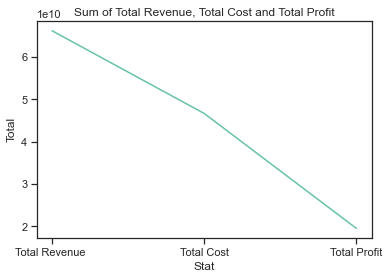

In [273]:
#create a line plot for the sum
sns.lineplot(x="Stat", y="Total", data=sumval) 
plt.title('Sum of Total Revenue, Total Cost and Total Profit')
plt.show()

In [274]:
#create a data from the Average and Max calculation to plot a graph for both the averages and the maximums.

average_max = pd.DataFrame({
    'Average': [1323667.810, 933121.869, 390545.947],
    'Maximum': [6682031.73, 5249075.04, 1738178.39],
   }, index=['Total Revenue', 'Total Cost', 'Total Profit'])
print(average_max)

                  Average     Maximum
Total Revenue 1323667.810 6682031.730
Total Cost     933121.869 5249075.040
Total Profit   390545.947 1738178.390


Text(0.5, 1.0, 'Total of Averages VS Maximum')

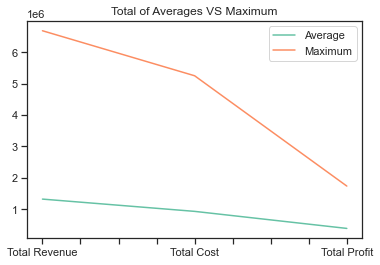

In [275]:
# Create two line plots from the above data frame.
fig = average_max.plot.line()
plt.title('Total of Averages VS Maximum')

# 4.5

Q4.5/ Now you will save these calculations below to a text file called MM_Calc.txt. When writing to the file, please output format such as:

In [276]:
#create a new txt file named MM_Calc.txt

with open("Data/MM_Calc.txt", "w+") as writer:
    writer.write('Sums:\n')
    for k,v in Sum.items():
        writer.write(f"{k}: {v}\n")
    
    writer.write('\nAverages:\n')
    for k,v in Avg.items():
        writer.write(f"{k}: {v}\n")
        
    writer.write('\nMaximums:\n')
    for k,v in Max.items():
        writer.write(f"{k}: {v}\n")

# Part 3: Cross-Reference Statistics

"We are in desperate need of a concise list of the Regions we sell to with the Countries that are located in each one."

For this part you will be cross-referencing the data in the CSV file and the getting an output and writing it to a new CSV file. 

1. Please get a list of the Regions and then the countries we sell to in that region. Please be sure no duplicates Regions or countries exist.
    1. (Does not have to be done this way)
        1. Non-pandas Solution advice: Please return this as a dictionary of lists with the keys of the dictionary being the name of each Region and the list attached to that being all the countries we sell to for that region. You may also return it as a Series of Lists (although I found that to be harder).

        2. Finally, if you want to use an alternate method with pandas Dataframes, that will be accepted as well. Be sure your output is easy to read and your code makes sense.

# 1.1

In [277]:
#Make a Dictionary with unique Countries Classified According to Their Region
regCountry = MMSales.groupby(['Region'])['Country'].unique().apply(list).to_dict() 
print(regCountry)

{'Asia': ['Indonesia', 'India', 'South Korea', 'Kazakhstan', 'Mongolia', 'Malaysia', 'Singapore', 'Brunei', 'Kyrgyzstan', 'Taiwan', 'Sri Lanka', 'North Korea', 'Cambodia', 'Tajikistan', 'Turkmenistan', 'Maldives', 'Laos', 'Myanmar', 'Bhutan', 'Vietnam', 'Japan', 'Philippines', 'China', 'Bangladesh', 'Uzbekistan', 'Thailand', 'Nepal'], 'Australia and Oceania': ['Tuvalu', 'Samoa ', 'Fiji', 'Marshall Islands', 'New Zealand', 'Solomon Islands', 'Vanuatu', 'Australia', 'Papua New Guinea', 'Nauru', 'Kiribati', 'Tonga', 'Palau', 'East Timor', 'Federated States of Micronesia'], 'Central America and the Caribbean': ['Antigua and Barbuda ', 'Saint Kitts and Nevis ', 'Saint Lucia', 'Trinidad and Tobago', 'Guatemala', 'Saint Vincent and the Grenadines', 'Jamaica', 'Grenada', 'Honduras', 'Belize', 'Barbados', 'El Salvador', 'Dominican Republic', 'The Bahamas', 'Cuba', 'Nicaragua', 'Costa Rica', 'Panama', 'Dominica', 'Haiti'], 'Europe': ['Iceland', 'Russia', 'Moldova ', 'Malta', 'Greece', 'Ukraine',

2. Write this out to a CSV file called Countries_By_Region.csv.

    1. (Be careful here as there is a header row when you convert the csv to a dictionary. If you end up getting the header row in your final result, just remove it. You are free to do it however you want as long as in the end its a dictionary of lists (or Series of Lists), the keys being the Regions and then the list for that key being the countries that is sold to, with no duplicates. And then print it to the csv file.)
   
    
     Your CSV file should look like below. Order of Regions and Countries is unimportant but structure should be the same. Here are the counts for the countries by Region:

    North America: 4, Europe: 48, Asia: 27, Australia & Oceania: 15, Central America & The Carribean: 20, Sub-Saharan Africa: 48, Middle East and North Africa: 23



# 1.2

In [278]:
regionCountry = pd.DataFrame.from_dict(regCountry, orient='index').transpose()
regionCountry.to_csv("Data/Countries_By_Region.csv",index=False)